<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
Massimo Nocentini<br>
<small>
<br>November 9, 2016: script creation, splitting
<br>November 7, 2016: check $\Phi_{ij}$ polys, `power` closed form
<br>November {4,5,6}, 2016: `inverse`, `power`, `sqrt` $g$ polys
<br>November 3, 2016: Fibonacci, $\mathcal{C}$, $d_{n,k}$ matrix for $\Phi$ polys
<br>November 2, 2016: fix $\Phi$ polynomials def, $\mathcal{P}$
</small>
</div>
</p>
<br>
<br>
<div align="center">
<b>Abstract</b><br>
Theory of matrix functions, with tutorial functions on simple matrix.
</div>

In [123]:
from sympy import *
from sympy.abc import n, i, N, x, lamda, phi, z, j, r, k, a

init_printing()

In [124]:
%run ../../src/matrix_functions.py

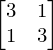

In [125]:
M = Matrix([
        [3, 1],
        [1, 3]
    ])
M

In [126]:
m = M.rows # degree of \Xi minimal polynomial

In [127]:
Phi_poly = Phi_poly_ctor(deg=m-1)
Phi_poly

In [128]:
with lift_to_Lambda(Phi_poly) as Phi_fn:
    pass

Phi_fn, Phi_fn(z, 3, j)

In [129]:
data, eigenvals, multiplicities = eigendata = eigen_data(M)
eigendata

In [130]:
make = Phi_poly_define(Phi_poly, eigendata)

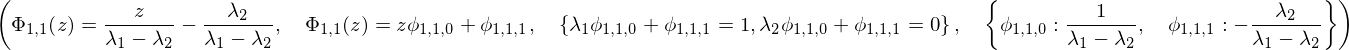

In [131]:
make(i=1, j=1,verbose_return=True)

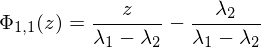

In [132]:
make(i=1, j=1,)

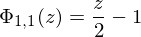

In [133]:
_.subs(eigenvals)

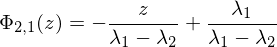

In [134]:
make = Phi_poly_define(Phi_poly, eigendata)
make(i=2, j=1,)

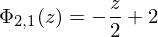

In [135]:
_.subs(eigenvals)

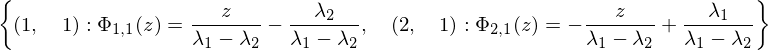

In [136]:
Phi_polynomials = component_polynomials(Phi_poly, eigendata)
Phi_polynomials

In [137]:
f, h = Function('f'), Function('h')
function_eq = define(let=f(z), be=h(z))
function_eq

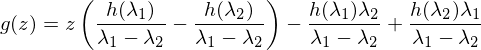

In [138]:
g = g_poly(function_eq, eigendata, Phi_polynomials)
g

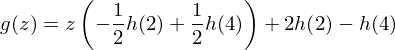

In [139]:
t = g.subs(eigenvals)
t

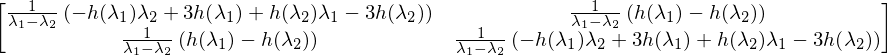

In [140]:
with lift_to_matrix_function(g) as g:
    res = g(M)

res

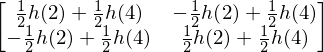

In [141]:
res.subs(eigenvals)

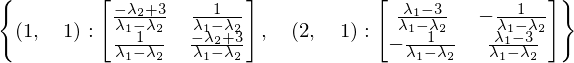

In [142]:
cmatrices = component_matrices(M, Phi_polynomials)
cmatrices

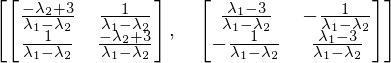

In [143]:
Zi1 = list(cm.as_immutable() for (i, j), cm in cmatrices.items() if j == 1)
Zi1

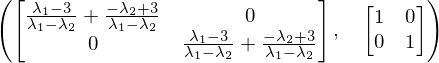

In [144]:
s = zeros(M.rows)
for Z in Zi1:
    s += Z
s, s.subs(eigenvals)

### `const`

In [45]:
f_const = define(let=f(z), be=r)
f_const

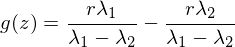

In [46]:
g_const = g_poly(f_const, eigendata, Phi_polynomials)
g_const

In [47]:
g_const = g_const.subs(eigenvals)
g_const

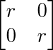

In [48]:
with lift_to_matrix_function(g_const) as g_const:
    m_const = g_const(m)
m_const

### `identity`

In [49]:
f_identity = Eq(f(z), z)
f_identity

In [50]:
g_identity = g_poly(f_identity, eigendata, Phi_polynomials, matrix_form=True)
g_identity

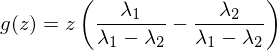

In [51]:
g_identity = g_poly(f_identity, eigendata, Phi_polynomials, matrix_form=False)
g_identity

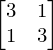

In [52]:
with lift_to_matrix_function(g_identity) as g_identity:
    m_identity = g_identity(m)
m_identity

### `sqrt`

In [53]:
f_sqrt = define(let=f(z), be=sqrt(z))
f_sqrt

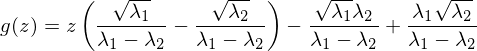

In [54]:
g_sqrt = g_poly(f_sqrt, eigendata, Phi_polynomials)
g_sqrt

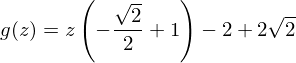

In [55]:
g_sqrt = g_sqrt.subs(eigenvals)
g_sqrt

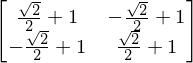

In [56]:
with lift_to_matrix_function(g_sqrt) as g_sqrt:
    m_sqrt = g_sqrt(m)
m_sqrt

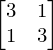

In [57]:
(m_sqrt**2).applyfunc(simplify)

### `power`

In [58]:
f_power = define(let=f(z), be=z**r)
f_power

In [60]:
g_power = g_poly(f_power, eigendata, Phi_polynomials, matrix_form=True)
g_power

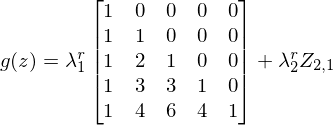

In [62]:
Z = IndexedBase('Z')
g_power.subs({Z[1,1]:Matrix(5,5, binomial)})

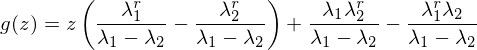

In [63]:
g_power = g_poly(f_power, eigendata, Phi_polynomials)
g_power

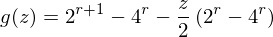

In [65]:
g_power = g_power.subs(eigenvals)
g_power.simplify()

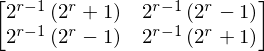

In [66]:
with lift_to_matrix_function(g_power) as g_power:
    m_power = g_power(m)
m_power

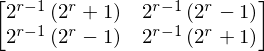

In [67]:
(m**r).applyfunc(simplify)

In [68]:
%%timeit
g_power(m)

10 loops, best of 3: 58.5 ms per loop


In [69]:
%%timeit
(m**r).applyfunc(simplify)

10 loops, best of 3: 64.6 ms per loop


### `log`

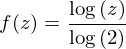

In [70]:
f_log = define(let=f(z), be=log(z, 2))
f_log

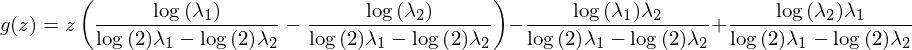

In [71]:
g_log = g_poly(f_log, eigendata, Phi_polynomials)
g_log

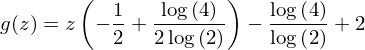

In [72]:
g_log = g_log.subs(eigenvals)
g_log

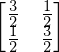

In [73]:
with lift_to_matrix_function(g_log) as g_log:
    m_log = g_log(m)
m_log

### `inverse`

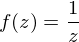

In [78]:
f_inverse = define(let=f(z), be=1/z)
f_inverse

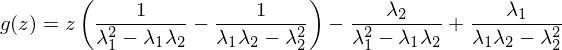

In [82]:
g_inverse = g_poly(f_inverse, eigendata, Phi_polynomials)
g_inverse

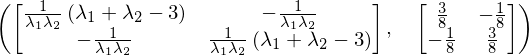

In [83]:
with lift_to_matrix_function(g_inverse) as g_inverse:
    m_inverse = g_inverse(m)

m_inverse, m_inverse.subs(eigenvals)

### `expt`

In [85]:
f_expt = define(let=f(z), be=exp(z))
f_expt

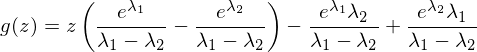

In [86]:
g_expt = g_poly(f_expt, eigendata, Phi_polynomials)
g_expt

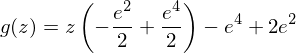

In [87]:
g_expt = g_expt.subs(eigenvals)
g_expt

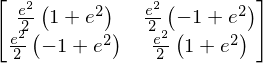

In [88]:
with lift_to_matrix_function(g_expt) as g_expt:
    m_expt = g_expt(m)
m_expt

### `geometric`

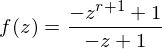

In [92]:
f_geo = define(let=f(z), be=(1-z**(r+1))/(1-z))
f_geo

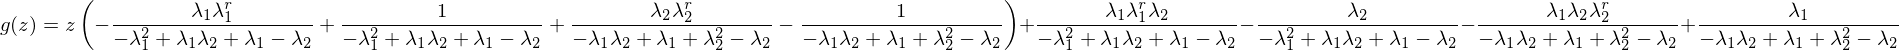

In [98]:
g_geo = g_poly(f_geo, eigendata, Phi_polynomials)
g_geo

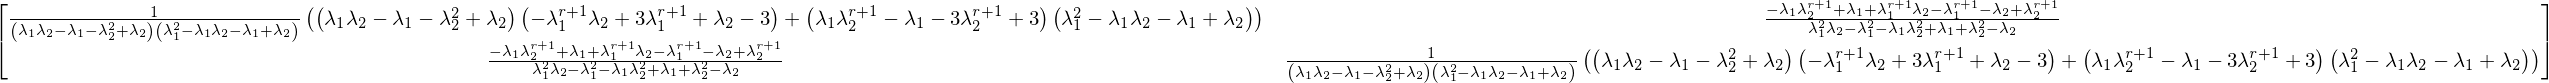

In [99]:
with lift_to_matrix_function(g_geo) as g_geo:
    m_geo = g_geo(m)

m_geo

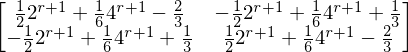

In [102]:
m_geo=m_geo.subs(eigenvals)
m_geo

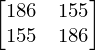

In [103]:
m_geo.subs({r:4})

In [105]:
s = Function('s')
sum_def = define(let=s(z), be=Sum(z**i, (i, 0, 4)).doit())
sum_def

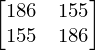

In [106]:
with lift_to_matrix_function(sum_def) as sum_fn:
    R = sum_fn(m)
R

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.